In [ ]:
# Install required libraries
!pip install matplotlib thop torchviz torchview torchvision torchsummary

In [2]:
import os
import torch
import torch.nn as nn
from torchsummary import summary
from torchviz import make_dot
from torchview import draw_graph
from IPython.display import Image, display
from thop import profile
import matplotlib.pyplot as plt

In [3]:
class NeuralArchitect(nn.Module):
    def __init__(self):
        super(NeuralArchitect, self).__init__()
        self.convolutional_layer = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.activation = nn.ReLU()
        self.dense_layer1 = nn.Linear(16 * 28 * 28, 128)
        self.dense_layer2 = nn.Linear(128, 10)

    def forward(self, input_tensor):
        x = self.convolutional_layer(input_tensor)
        x = self.activation(x)
        x = x.view(x.size(0), -1)
        x = self.dense_layer1(x)
        x = self.activation(x)
        x = self.dense_layer2(x)
        return x

# Create an instance of NeuralArchitect
network = NeuralArchitect()

# Create a sample input
sample_input = torch.randn(1, 3, 28, 28)

# Generate the output
output = network(sample_input)  # Note: I used network(sample_input) instead of network.construct(sample_input)

# Print the network structure
print(network)

# Print the output shape
print("Output shape:", output.shape)

NeuralArchitect(
  (convolutional_layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): ReLU()
  (dense_layer1): Linear(in_features=12544, out_features=128, bias=True)
  (dense_layer2): Linear(in_features=128, out_features=10, bias=True)
)
Output shape: torch.Size([1, 10])


This method excels at basic layer visualization but falls short in conveying architectural complexity. It presents a simplified view, ideal for quick overviews, yet fails to capture intricate layer interactions and data flow. For an in-depth understanding, I'll employ more advanced techniques.

## Visualize Neural Network Architecture with PyTorch and Graphviz

This code snippet demonstrates the process of creating, visualizing, and analyzing a neural network using PyTorch and Graphviz. It generates a computational graph of the NeuralArchitect model, renders it as an image for visual inspection, and provides essential information about the network's structure and output shape.

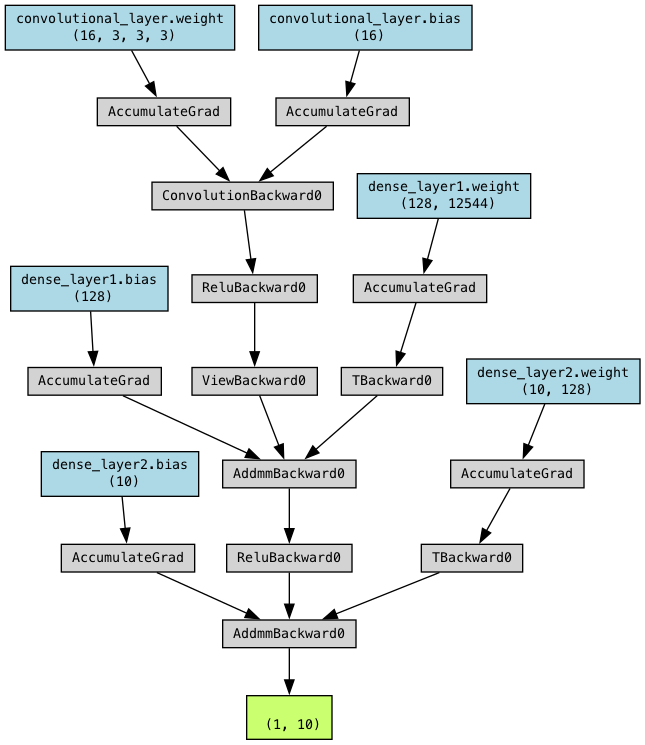

NeuralArchitect(
  (convolutional_layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): ReLU()
  (dense_layer1): Linear(in_features=12544, out_features=128, bias=True)
  (dense_layer2): Linear(in_features=128, out_features=10, bias=True)
)
Output shape: torch.Size([1, 10])


In [4]:
# Define NeuralArchitect class
network = NeuralArchitect()

# Create a sample input
sample_input = torch.randn(1, 3, 28, 28)

# Generate the output
output = network(sample_input)  # Changed from network.construct to network

# Create the graph
graph = make_dot(output, params=dict(network.named_parameters()))

# Set the path to the dot executable in the environment
# Make sure to replace this with your actual dot path if different
os.environ["PATH"] += os.pathsep + "/usr/local/bin/dot"

# Render the graph to a temporary file
temp_filename = "temp_neural_structure"
graph.render(temp_filename, format="png", cleanup=True)

# Display the image
display(Image(filename=f"{temp_filename}.png"))

# Remove the temporary file
os.remove(f"{temp_filename}.png")

# Print the network structure
print(network)

# Print the output shape
print("Output shape:", output.shape)

In [5]:
# Create an instance of the NeuralArchitect
network = NeuralArchitect()

# Print the network architecture
print(network)

# Use torchsummary to get a detailed summary of the network
summary(network, (3, 28, 28))

# Analyse the network parameters
total_params = sum(p.numel() for p in network.parameters())
trainable_params = sum(p.numel() for p in network.parameters() if p.requires_grad)

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Examine the output shape at each layer
sample_input = torch.randn(1, 3, 28, 28)

def hook_fn(module, input, output):
    print(f"{module.__class__.__name__} output shape: {output.shape}")

for name, module in network.named_modules():
    if not isinstance(module, nn.Sequential):
        module.register_forward_hook(hook_fn)

_ = network(sample_input)

# Analyse the activation distributions
activations = {}

def activation_hook(name):
    def hook(module, input, output):
        activations[name] = output.detach()
    return hook

for name, module in network.named_modules():
    if isinstance(module, (nn.ReLU, nn.Linear, nn.Conv2d)):
        module.register_forward_hook(activation_hook(name))

_ = network(sample_input)

for name, activation in activations.items():
    print(f"{name} activation stats:")
    print(f"  Mean: {activation.mean().item():.4f}")
    print(f"  Std: {activation.std().item():.4f}")
    print(f"  Min: {activation.min().item():.4f}")
    print(f"  Max: {activation.max().item():.4f}")

NeuralArchitect(
  (convolutional_layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): ReLU()
  (dense_layer1): Linear(in_features=12544, out_features=128, bias=True)
  (dense_layer2): Linear(in_features=128, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             448
              ReLU-2           [-1, 16, 28, 28]               0
            Linear-3                  [-1, 128]       1,605,760
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 1,607,498
Trainable params: 1,607,498
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 6.13
Estimated Total Size (MB): 6.33
--------------------

NeuralArchitect(
  (convolutional_layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation): ReLU()
  (dense_layer1): Linear(in_features=12544, out_features=128, bias=True)
  (dense_layer2): Linear(in_features=128, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             448
              ReLU-2           [-1, 16, 28, 28]               0
            Linear-3                  [-1, 128]       1,605,760
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 1,607,498
Trainable params: 1,607,498
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 6.13
Estimated Total Size (MB): 6.33
--------------------

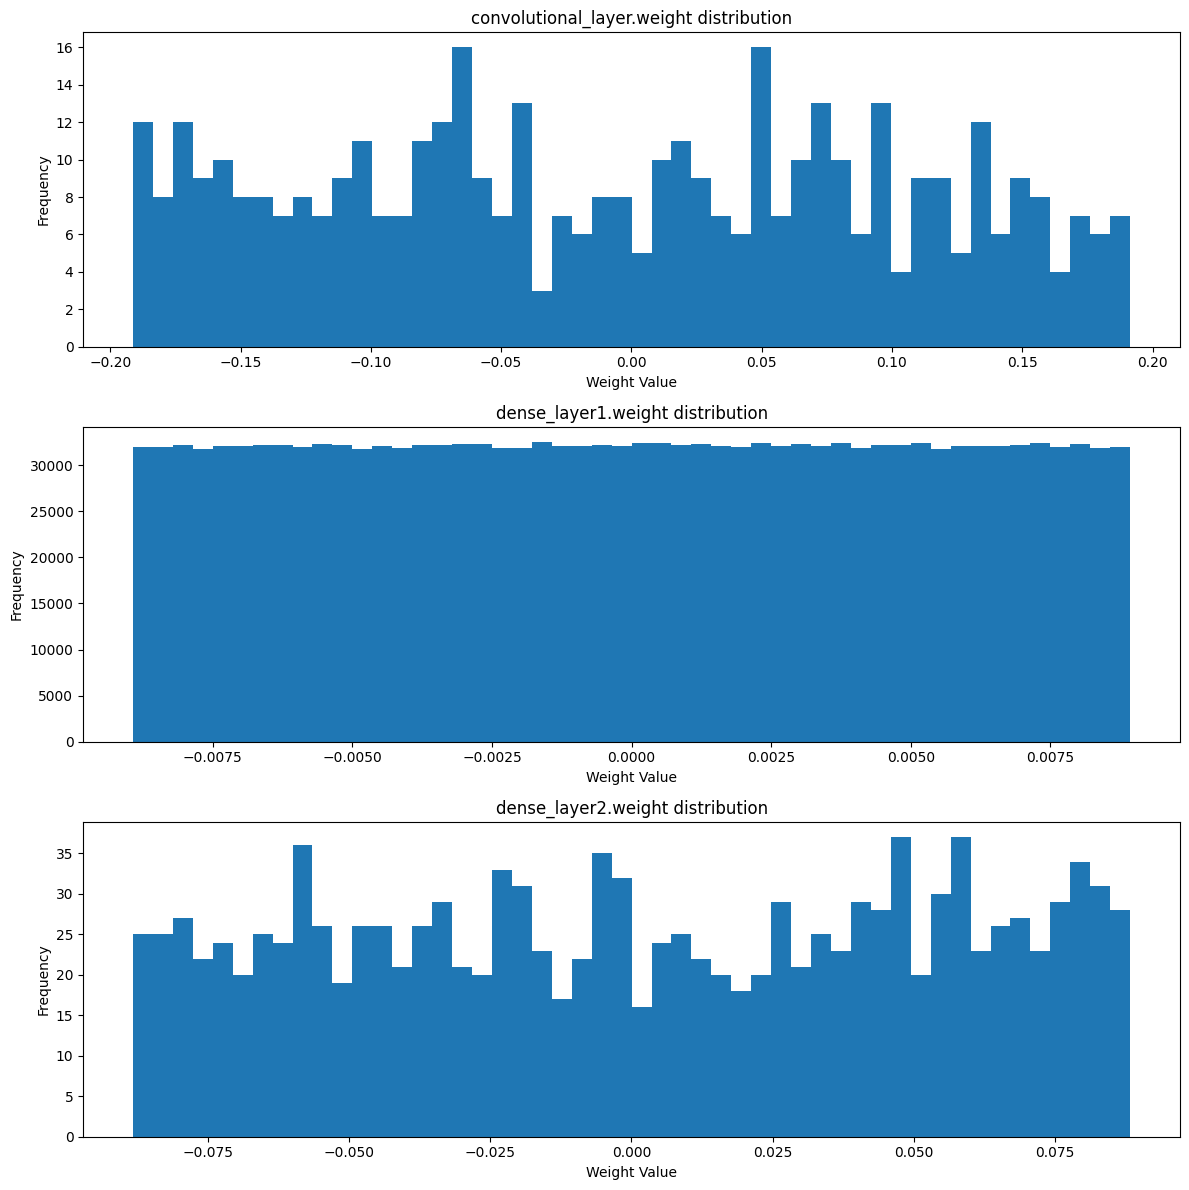

Conv2d output shape: torch.Size([1, 16, 28, 28])

Layer: Conv2d
Input shape: torch.Size([1, 3, 28, 28])
Output shape: torch.Size([1, 16, 28, 28])
Parameters: 448
Weight stats:
  Mean: -0.0072
  Std: 0.1088
Bias stats:
  Mean: -0.0412
  Std: 0.0895
ReLU output shape: torch.Size([1, 16, 28, 28])
Linear output shape: torch.Size([1, 128])

Layer: Linear
Input shape: torch.Size([1, 12544])
Output shape: torch.Size([1, 128])
Parameters: 1605760
Weight stats:
  Mean: 0.0000
  Std: 0.0052
Bias stats:
  Mean: -0.0005
  Std: 0.0050
ReLU output shape: torch.Size([1, 128])
Linear output shape: torch.Size([1, 10])

Layer: Linear
Input shape: torch.Size([1, 128])
Output shape: torch.Size([1, 10])
Parameters: 1290
Weight stats:
  Mean: 0.0024
  Std: 0.0519
Bias stats:
  Mean: 0.0015
  Std: 0.0489
NeuralArchitect output shape: torch.Size([1, 10])
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] 

In [6]:
# Create an instance of the NeuralArchitect
network = NeuralArchitect()

# Print the network architecture
print(network)

# Use torchsummary to get a detailed summary of the network
summary(network, (3, 28, 28))

# Analyse the network parameters
total_params = sum(p.numel() for p in network.parameters())
trainable_params = sum(p.numel() for p in network.parameters() if p.requires_grad)

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Examine the output shape at each layer
sample_input = torch.randn(1, 3, 28, 28)

def hook_fn(module, input, output):
    print(f"{module.__class__.__name__} output shape: {output.shape}")

for name, module in network.named_modules():
    if not isinstance(module, nn.Sequential):
        module.register_forward_hook(hook_fn)

_ = network(sample_input)

# Analyse the activation distributions
activations = {}

def activation_hook(name):
    def hook(module, input, output):
        activations[name] = output.detach()
    return hook

for name, module in network.named_modules():
    if isinstance(module, (nn.ReLU, nn.Linear, nn.Conv2d)):
        module.register_forward_hook(activation_hook(name))

_ = network(sample_input)

for name, activation in activations.items():
    print(f"{name} activation stats:")
    print(f"  Mean: {activation.mean().item():.4f}")
    print(f"  Std: {activation.std().item():.4f}")
    print(f"  Min: {activation.min().item():.4f}")
    print(f"  Max: {activation.max().item():.4f}")

# Analyse gradient flow
network.zero_grad()
output = network(sample_input)
output.sum().backward()

for name, param in network.named_parameters():
    if param.requires_grad:
        print(f"{name} gradient stats:")
        print(f"  Mean: {param.grad.mean().item():.4f}")
        print(f"  Std: {param.grad.std().item():.4f}")
        print(f"  Min: {param.grad.min().item():.4f}")
        print(f"  Max: {param.grad.max().item():.4f}")

# Visualize weight distributions
weight_params = [(name, param) for name, param in network.named_parameters() if 'weight' in name]
num_weight_layers = len(weight_params)

fig, axes = plt.subplots(num_weight_layers, 1, figsize=(12, 4*num_weight_layers))
axes = axes.flatten() if num_weight_layers > 1 else [axes]

for i, (name, param) in enumerate(weight_params):
    ax = axes[i]
    ax.hist(param.detach().cpu().numpy().flatten(), bins=50)
    ax.set_title(f'{name} distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Weight Value')

plt.tight_layout()
plt.show()

# Layer-wise analysis
def layer_analysis(module, input, output):
    print(f"\nLayer: {module.__class__.__name__}")
    print(f"Input shape: {input[0].shape}")
    print(f"Output shape: {output.shape}")
    print(f"Parameters: {sum(p.numel() for p in module.parameters())}")
    if hasattr(module, 'weight'):
        print(f"Weight stats:")
        print(f"  Mean: {module.weight.mean().item():.4f}")
        print(f"  Std: {module.weight.std().item():.4f}")
    if hasattr(module, 'bias') and module.bias is not None:
        print(f"Bias stats:")
        print(f"  Mean: {module.bias.mean().item():.4f}")
        print(f"  Std: {module.bias.std().item():.4f}")

for name, module in network.named_modules():
    if isinstance(module, (nn.Conv2d, nn.Linear)):
        module.register_forward_hook(layer_analysis)

_ = network(sample_input)

# Compute FLOPs and memory usage
flops, params = profile(network, inputs=(sample_input,))
print(f"\nFLOPs: {flops/1e6:.2f}M")
print(f"Params: {params/1e6:.2f}M")

# Analyse receptive field
def receptive_field(module, input, output):
    if isinstance(module, nn.Conv2d):
        kernel_size = module.kernel_size[0]
        stride = module.stride[0]
        padding = module.padding[0]
        print(f"\nLayer: {module.__class__.__name__}")
        print(f"Kernel size: {kernel_size}")
        print(f"Stride: {stride}")
        print(f"Padding: {padding}")
        print(f"Receptive field increase: {kernel_size - 1}")

for name, module in network.named_modules():
    if isinstance(module, nn.Conv2d):
        module.register_forward_hook(receptive_field)

_ = network(sample_input)